### Problem Statement

            As mentioned in the problem statement, the main objective of this project to provide the recommendation of a product to a user after dividing into 2 separate clusters. These clusters helps to bring the customers with similar characteristics together. Approach for solving the above problem .
* Dividing the customers into 2 Clusters i.e., Cluster -0 & Cluster -1.
* Applying recommendation Engine concept to each cluster based on it’s features.


### Data Description:

* customer_visit_score                          : a score based on how regularly the customer visits the website
* customer_product_search_score      : quality or price range of product that the customer searches for.
* customer_ctr_score                            : how many of the searched links does the customer click
* customer_stay_score                         : a score based on the time spent on an avg. by the customer
* customer_frequency_score               : a score based on how many times in a day the customer visit the website
* customer_product_variation_score  : a score based on how many varities of products does a customer search 
* customer_order_score                       : Score based on the no. of orders that has been succesfully delivered and not returned
* customer_affinity_score                     : an internal overall score calculated which signifies the affinity of the customer towards the website
* customer_category                            : the cluster/group to which the customer should belong to
* customer_active_segment                : the categorization of the customers based on their activity
* X_1                                                       : Anonymized feature based on loyalty of the customer


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import Pipeline
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, classification_report

from scipy.stats import mode
from scipy import stats

C:\Users\jayaprakash.balla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\jayaprakash.balla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading the Datasets

In [4]:
data = pd.read_csv('train.csv', index_col='customer_id')

In [5]:
data.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
customer_id,,,,,,,,,,,
csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [6]:
print(data.shape,'\n')
print(data.info())

(10738, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, csid_1 to csid_10738
Data columns (total 11 columns):
customer_visit_score                10738 non-null float64
customer_product_search_score       10696 non-null float64
customer_ctr_score                  10738 non-null float64
customer_stay_score                 10701 non-null float64
customer_frequency_score            10738 non-null float64
customer_product_variation_score    10692 non-null float64
customer_order_score                10672 non-null float64
customer_affinity_score             10738 non-null float64
customer_active_segment             10715 non-null object
X1                                  10701 non-null object
customer_category                   10738 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 1006.7+ KB
None


# Description of the data

In [7]:
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [8]:
test_data = pd.read_csv("test.csv", index_col='customer_id')

In [9]:
test_data.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
customer_id,,,,,,,,,,
csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [10]:
print(test_data.shape,'\n')
print(test_data.info())

(7160, 10) 

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, csid_10739 to csid_17898
Data columns (total 10 columns):
customer_visit_score                7160 non-null float64
customer_product_search_score       7131 non-null float64
customer_ctr_score                  7160 non-null float64
customer_stay_score                 7144 non-null float64
customer_frequency_score            7160 non-null float64
customer_product_variation_score    7117 non-null float64
customer_order_score                7119 non-null float64
customer_affinity_score             7160 non-null float64
customer_active_segment             7148 non-null object
X1                                  7135 non-null object
dtypes: float64(8), object(2)
memory usage: 615.3+ KB
None


In [11]:
test_data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


## Preprocessing the data

In [12]:
print(data.nunique(),'\n')
print(test_data.nunique())

customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment                 5
X1                                      5
customer_category                       2
dtype: int64 

customer_visit_score                7160
customer_product_search_score       7131
customer_ctr_score                  7160
customer_stay_score                 7144
customer_frequency_score            7160
customer_product_variation_score    7117
customer_order_score                7119
customer_affinity_score             7160
customer_active_segment                5
X1                                     5
dtype: int64


In [13]:
data.isna().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [14]:
test_data.isna().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [15]:
print(data.customer_active_segment.value_counts())
print(test_data.customer_active_segment.value_counts())

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64
C     3251
B     3127
AA     321
A      249
D      200
Name: customer_active_segment, dtype: int64


In [16]:
print(data.X1.value_counts())
print(test_data.X1.value_counts())

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64
BA    2810
A     1615
AA    1366
F     1272
E       72
Name: X1, dtype: int64


## Visualizing the data

    The visualization helps to find out the patterns in the data.Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect trends, and outliers in groups of data. The below graph shows the distribution of 

        with the help of below count_plot we will be able to get the information about count of number of '0' and '1'.

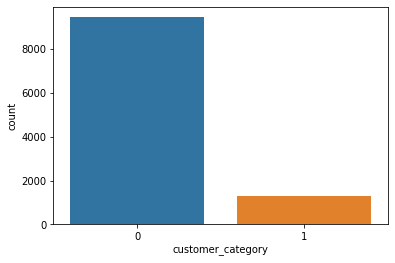

0    9443
1    1295
Name: customer_category, dtype: int64
Percentage of prediction: 12.059973924380705 %


In [17]:
sns.countplot(x='customer_category',data=data)
plt.show()

print(data.customer_category.value_counts())

count_1 = len(data[data.customer_category == 1])
count_0 = len(data[data.customer_category == 0])

percent_success = (count_1/(count_1 + count_0))*100

print('Percentage of prediction:', percent_success, "%")

        From the above the number of '0' is 9443 and '1' are 1295.Seems to be there is class imbalance problem.Will apply some ML techniques while processing to the model so as to get the predictions as good as possible. 

## FactorPlot for 'X1'

    Factor_plot used to draw a categorical plot onto a FacetGrid.With the help of these we will be able to get an idea of distribution of 'X1' for 1 and 0.

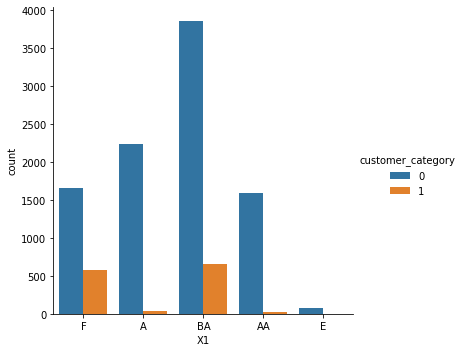

In [18]:
print(sns.factorplot('X1',data = data, hue = 'customer_category',kind = 'count'))

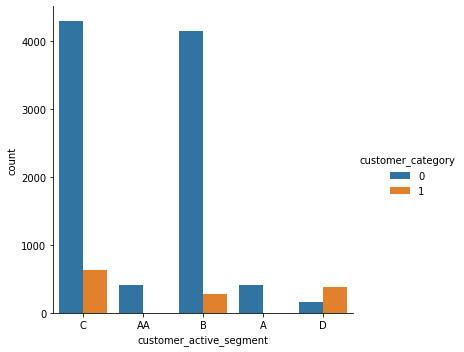

In [19]:
sns.factorplot('customer_active_segment',data = data, hue = 'customer_category',kind = 'count')

    #### The 'x1' is linclied more towards to '0' which is already over sampled in the data

# Correlation Plot
* #### Correlation Matrix is basically a covariance matrix. Also known as the auto-covariance matrix, dispersion matrix, variance matrix, or variance-covariance matrix. It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set.

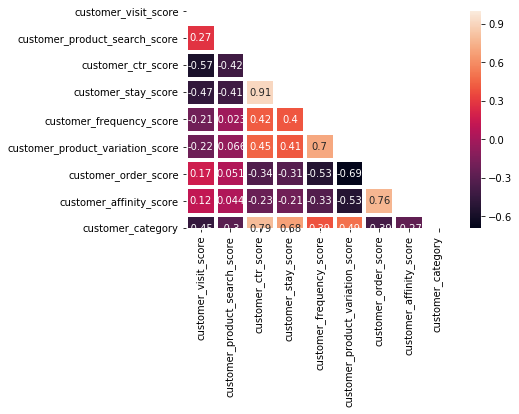

In [20]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=3, mask = matrix)

* Based on the correlation of different independent variables and the relation with the Category value, it is good idea to drop  the below features , which helps the model to predict more accurately and increases precision Value ['customer_stay_score','X1','customer_active_segment','customer_visit_score','customer_product_search_score','customer_order_score','customer_affinity_score','customer_frequency_score']

In [21]:
drop_list = ['customer_stay_score','X1','customer_active_segment','customer_visit_score','customer_product_search_score','customer_order_score','customer_affinity_score','customer_frequency_score']

In [22]:
data.drop(drop_list, axis=1, inplace=True)
test_data.drop(drop_list, axis=1, inplace=True)

print(data.shape)
print(test_data.shape)

(10738, 3)
(7160, 2)


* #### Checking the correlation after dropping the columns that are  not very useful to check if the remaining one can be used for prediction. 

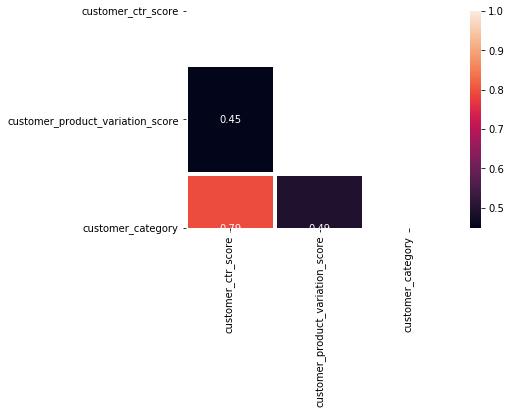

In [23]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=3, mask = matrix)

## Imputing the null values

In [24]:
print(data.isna().sum(),'\n')
print(test_data.isna().sum())

customer_ctr_score                   0
customer_product_variation_score    46
customer_category                    0
dtype: int64 

customer_ctr_score                   0
customer_product_variation_score    43
dtype: int64


In [25]:
data.fillna(data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

print(data.isna().sum(),'\n')
print(test_data.isna().sum())

customer_ctr_score                  0
customer_product_variation_score    0
customer_category                   0
dtype: int64 

customer_ctr_score                  0
customer_product_variation_score    0
dtype: int64


# Correcting Skewness : 

* #### With the help of below distribution plot the variables which are used for predictng are not normal distributed so chaging them will help model to predict more accurately. 

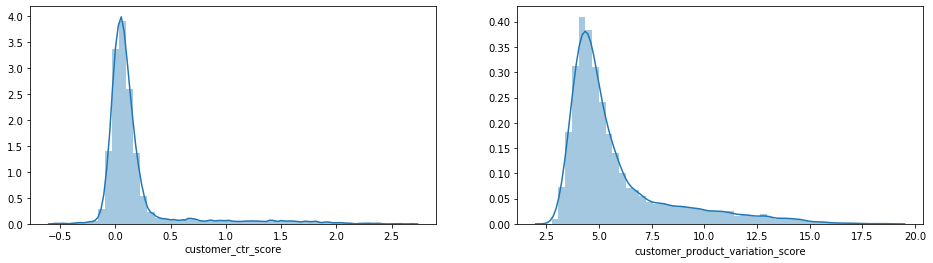

In [26]:
fig, axe = plt.subplots(nrows=1, ncols=2,figsize=(16,4))
axe = axe.flatten()

sns.distplot(data['customer_ctr_score'], ax=axe[0])
sns.distplot(data['customer_product_variation_score'], ax=axe[1])

In [27]:
data['customer_product_variation_score'] = stats.boxcox(data['customer_product_variation_score'])[0]
print(data.customer_product_variation_score.skew())

0.1355550802575636


In [29]:
data['customer_ctr_score'] = np.log(data['customer_ctr_score']+1)
print(data.customer_ctr_score.skew())

1.0221864138721888


* #### After correcting the skewness with the help of stats.boxcox and log functions we we able to get skewness equal to 0 and 1 for 2 columns

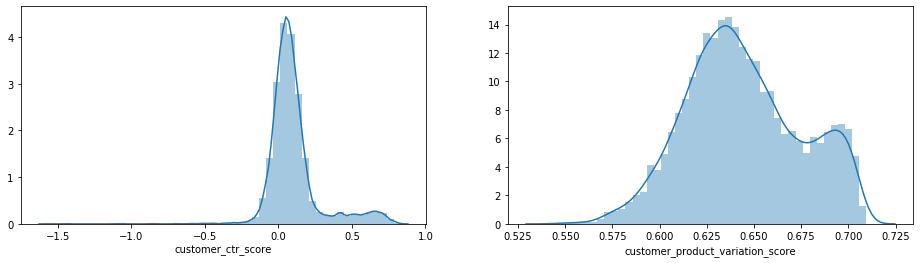

In [30]:
fig, axe = plt.subplots(nrows=1, ncols=2,figsize=(16,4))
axe = axe.flatten()

sns.distplot(data['customer_ctr_score'], ax=axe[0])
sns.distplot(data['customer_product_variation_score'], ax=axe[1])

In [31]:
data.fillna(data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

print(data.isna().sum(),'\n')
print(test_data.isna().sum())

customer_ctr_score                  0
customer_product_variation_score    0
customer_category                   0
dtype: int64 

customer_ctr_score                  0
customer_product_variation_score    0
dtype: int64


## Splitting the data as Train and Validation

* #### Here comes the first step for building the model spliting the data into train and validation and which can be used for analysing the bias-variance trade-off

* #### Standarziation of data helps us to diferent distance based algorithm's to the data available

In [32]:
X = data.drop('customer_category',axis=1)
Y = data.customer_category

In [33]:
sd = MinMaxScaler()

In [34]:
X = pd.DataFrame(sd.fit_transform(X), columns=X.columns)
test_data = pd.DataFrame(sd.fit_transform(test_data), columns=test_data.columns)

In [35]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

print(x_train.shape, y_train.shape,'\n')
print(x_test.shape, y_test.shape)

(7516, 2) (7516,) 

(3222, 2) (3222,)


### Stacking

* ####  Stacking is based on a simple idea: instead of using trivial functions(such as hard voting) to aggregate the predictions of all predictors in an ensemble,why don’t we train a model to perform this aggregation? for example  ensemble performing a regression task on a new instance. Each of the predictions from different model predicts a different value (3.1, 2.7, and 2.9), and then the final predictor takes these predictions as inputs and makes the final prediction (3.0).

* #### Let's try building Logistic Regression, RandomForest, KNN,XGB Classifier for trying Stacking methods

In [36]:
Log_Reg = LogisticRegression()  

Log_Reg.fit(x_train, y_train)

Log_train_pred =  Log_Reg.predict(x_train)
Log_test_pred = Log_Reg.predict(x_test)

Log_future_pred = Log_Reg.predict(test_data)

In [37]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)

RF_train_pred = RF.predict(x_train)
RF_test_pred = RF.predict(x_test)
RF_future_pred = RF.predict(test_data)

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)  

knn.fit(x_train, y_train)

knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)


knn_future_pred = knn.predict(test_data)

In [39]:
XGB = XGBClassifier()

XGB.fit(x_train, y_train)

xgb_train_pred = XGB.predict(x_train)
xgb_test_pred = XGB.predict(x_test)

xgb_future_pred = XGB.predict(test_data)

In [40]:
stack_train = pd.DataFrame([Log_train_pred, RF_train_pred, knn_train_pred, xgb_train_pred])
stack_test = pd.DataFrame([Log_test_pred, RF_test_pred, knn_test_pred, xgb_test_pred])
stack_future = pd.DataFrame([Log_future_pred, RF_future_pred, knn_future_pred, xgb_future_pred])

In [41]:
stack_train = stack_train.T
stack_test = stack_test.T


In [42]:
stack_future = stack_future.T

In [43]:
stack_train.columns = ['Log_train_pred','RF_train_pred','knn_train_pred','xgb_train_pred']
stack_test.columns = ['Log_train_pred','RF_train_pred','knn_train_pred','xgb_train_pred']
stack_future.columns = ['Log_train_pred','RF_train_pred','knn_train_pred','xgb_train_pred']

In [44]:
print(stack_train.shape)
print(stack_test.shape)

(7516, 4)
(3222, 4)


In [45]:
stack_train.head()

,Log_train_pred,RF_train_pred,knn_train_pred,xgb_train_pred
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,1,1
4,0,0,0,0


In [46]:
stack_test.head()

,Log_train_pred,RF_train_pred,knn_train_pred,xgb_train_pred
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [47]:
LOG = XGBClassifier()

LOG.fit(stack_train,y_train)

stacked_pred_train = LOG.predict(stack_train)
stacked_pred_test = LOG.predict(stack_test)

In [48]:
stack_future.values

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [49]:
print(precision_score(y_train, stacked_pred_train, average= 'macro'))
print(precision_score(y_test, stacked_pred_test, average = 'macro'))

1.0
0.9638378186568201


In [50]:
print("Classification Report:")
print(classification_report(y_test,stacked_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test,stacked_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2858
           1       0.94      0.87      0.91       364

    accuracy                           0.98      3222
   macro avg       0.96      0.93      0.95      3222
weighted avg       0.98      0.98      0.98      3222

Confusion Matrix:
[[2839   19]
 [  46  318]]


#  Bias - Varaince Trade-off

        With the help of above precision score on train and validation data we would be able to get to a conclusion as the DT model is over fitting the data.
As precision Score on Train Data  : 1.0
                      Test  Data  : 0.95
model is not generalized well with respect to Train and Test data.
Which indicates it is exactly over-fitting the data

In [51]:
print(classification_report(stacked_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2885
           1       0.87      0.94      0.91       337

    accuracy                           0.98      3222
   macro avg       0.93      0.96      0.95      3222
weighted avg       0.98      0.98      0.98      3222



In [52]:
stacked_pred_future =  LOG.predict(stack_future)

In [53]:
df  = pd.read_csv("test.csv")

In [54]:
DF = pd.DataFrame(list(zip(df['customer_id'],stacked_pred_future)),columns=['customer_id','customer_category'])
DF.to_csv("Stack.csv",index=False)
DF.shape

(7160, 2)

# Trying out different ML Models

# DecisionTree

In [55]:
#DecisionTree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
DecisionTree = RandomForestClassifier()

In [56]:
DecisionTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
DT_train_pred = DecisionTree.predict(x_train)
DT_test_pred = DecisionTree.predict(x_test)

In [58]:
print(precision_score(y_train, DT_train_pred, average='macro'))
print(precision_score(y_test, DT_test_pred, average='macro'))

1.0
0.9624391665093681


In [59]:
DecisionTree.feature_importances_

array([0.73994424, 0.26005576])

# Logistc Regression

In [62]:
Log_Reg = Pipeline(steps=[('SMOTE', SMOTE()), ('classifier', LogisticRegression())])
#Log_Reg = LogisticRegression()

In [63]:
Log_Reg.fit(x_train,y_train)

Pipeline(steps=[('SMOTE',
                 SMOTE(k=None, k_neighbors=5, kind='regular', m=None,
                       m_neighbors=10, n_jobs=1, out_step=0.5,
                       random_state=None, ratio='auto', svm_estimator=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))])

In [64]:
Log_train_pred = Log_Reg.predict(x_train)
Log_test_pred = Log_Reg.predict(x_test)

In [65]:
print(precision_score(y_train, Log_train_pred, average='macro'))
print(precision_score(y_test, Log_test_pred, average='macro'))

0.8954665987594986
0.9021785712727097


In [66]:
print(accuracy_score(y_train, Log_train_pred))
print(accuracy_score(y_test, Log_test_pred))

0.9602182011708356
0.9667908131595282


##  Classification Report Logistic Regression 

In [67]:
print(classification_report(y_test,Log_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2858
           1       0.82      0.91      0.86       364

    accuracy                           0.97      3222
   macro avg       0.90      0.94      0.92      3222
weighted avg       0.97      0.97      0.97      3222



# Logistic Regression Without SMOTE()

In [68]:
Log_Reg = LogisticRegression()

In [69]:
Log_Reg.fit(x_train,y_train)
Log_train_pred = Log_Reg.predict(x_train)
Log_test_pred = Log_Reg.predict(x_test)
print(precision_score(y_train, Log_train_pred, average='macro'))
print(precision_score(y_test, Log_test_pred, average='macro'))
print(accuracy_score(y_train, Log_train_pred))
print(accuracy_score(y_test, Log_test_pred))

0.962133502228603
0.97000259000259
0.9648749334752528
0.972998137802607


# Classification Report and Confusion Matrix

In [70]:
print("Classification Report:")
print(classification_report(y_test,Log_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,Log_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2858
           1       0.97      0.79      0.87       364

    accuracy                           0.97      3222
   macro avg       0.97      0.89      0.93      3222
weighted avg       0.97      0.97      0.97      3222

Confusion Matrix:
[[2848   10]
 [  77  287]]


In [71]:
Log_Reg.coef_

array([[19.90052449,  5.99973572]])

* ## By comparing different models and different techniques logistic regression seems to be predicting more accurately which can be evident from Classification Report

* ## By comparing the results of logistic regression with SMOTE and without SMOTE.Logistic Regression without SMOTE is giving the precision vaue of 97 for both 0 and 1.so using the same for predicting the "Customer category" as below

# Predicting on the test_data

In [72]:
test_data_pred = Log_Reg.predict(test_data)

In [73]:
df  = pd.read_csv("test.csv")

### Exporting the results to CSV format to upload in hackererth platform

In [74]:
DF = pd.DataFrame(list(zip(df['customer_id'],test_data_pred)),columns=['customer_id','customer_category'])
DF.to_csv("Decision.csv",index=False)
DF.shape

(7160, 2)

### The result for the above predicted values is attached below.

# 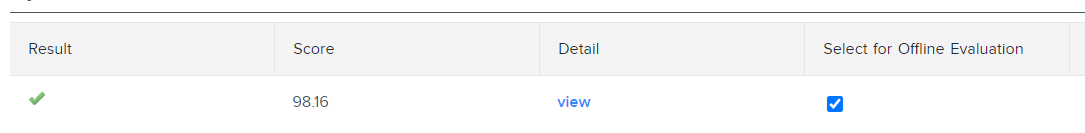